# Neural Network project for a bank customer churn

In [1056]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as  sns
import warnings
warnings.filterwarnings('ignore')
from keras.layers import *
from keras.models import *

In [887]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [1111]:
tf.random.set_seed(7)

## 1.Read the data set

In [751]:
bank_df=pd.read_csv('bank.csv',header=0)

### EDA

In [752]:
bank_df.shape

(10000, 14)

In [753]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [754]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [755]:
bank_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [757]:
bank_df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [756]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


#### Bank daset has 14 attributes with a total of 10000 rows for each customer.There are no null or missing values.Most of the datatypes are numeric except for 3 columns :Surname,Gender and Geography.Data is nominal and on different scales.

## 2.Drop the columns which are unique for all users like IDs 

In [774]:
bank_df.CustomerId.unique().shape

(10000,)

In [775]:
bank_df.Surname.unique().shape

(2932,)

In [776]:
bank_df.RowNumber.unique().shape

(10000,)

#### It can be seen that Customer ID , Surname and Rownumber are not very useful, so these coulumns will be dropped.

In [789]:
bank_df.drop('RowNumber',axis=1,inplace=True)


In [790]:
bank_df.drop('Surname',axis=1,inplace=True)

In [791]:
bank_df.drop('CustomerId',axis=1,inplace=True)

In [792]:
bank_df.shape

(10000, 11)

#### There are 2 columns that have unique sequence values such as CustomerID and Rownumber. Also, there is Surname column which is not very useful. So all the 3 columns will be dropped.

### Age attribute analysis

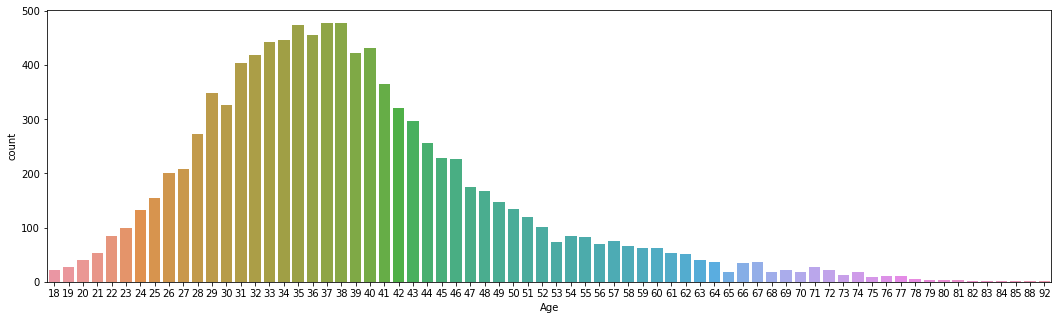

In [27]:
plt.figure(figsize=(18,5))
sns.countplot(bank_df['Age'])

#### Its a right skewed distribution with mean value of 44 years.The bulk of populations is between 25 years to 50 years. The youngest person is of age 18 years and the oldest is 92 years old. 

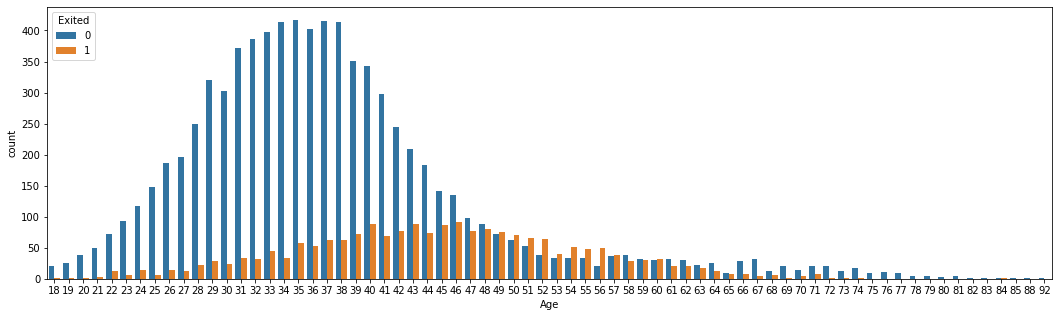

In [28]:
plt.figure(figsize=(18,5))
sns.countplot(bank_df['Age'],hue=bank_df['Exited'])

#### The exited customers are mostly between ages 35 to 57 years. The churn is very low for very young and very old customers.

### CreditScore Attribute analysis

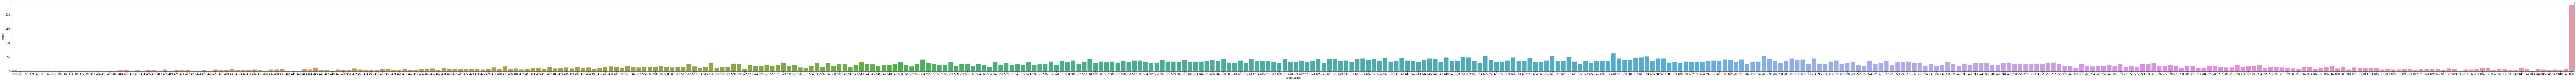

In [783]:
plt.figure(figsize=(180,5))
sns.countplot(bank_df['CreditScore'])

#### The median score is .The lowest score is 350 and the highest is 850. The majority of customers have credit score of 850.

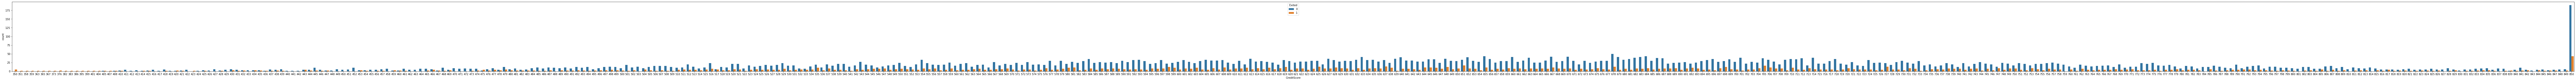

In [29]:
plt.figure(figsize=(180,5))
sns.countplot(bank_df['CreditScore'],hue=bank_df['Exited'])

#### The customer churn is uniform accross all credit scores.

### Geography Attribute Analysis

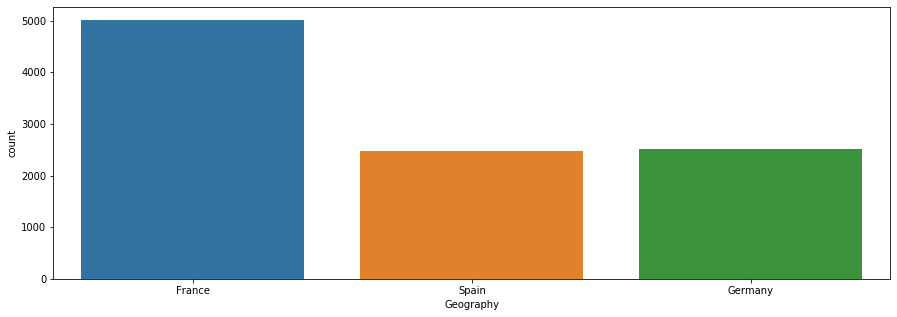

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(bank_df['Geography'])

#### Most of the customers are from France and there are equal number of customers from Spain and Germany.

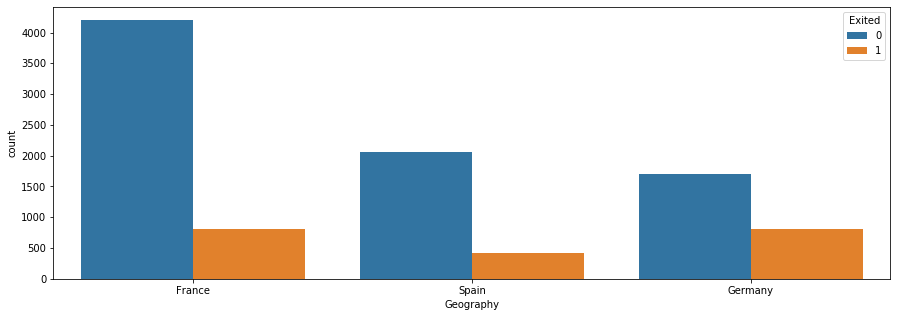

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(bank_df['Geography'],hue=bank_df['Exited'])

#### The exited customers are more from Germany and France than Spain

### Gender Attribute Analysis

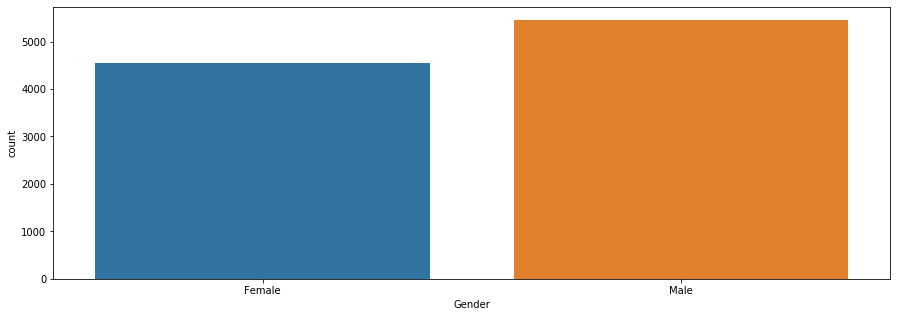

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(bank_df['Gender'])

#### There are more number of males than females.

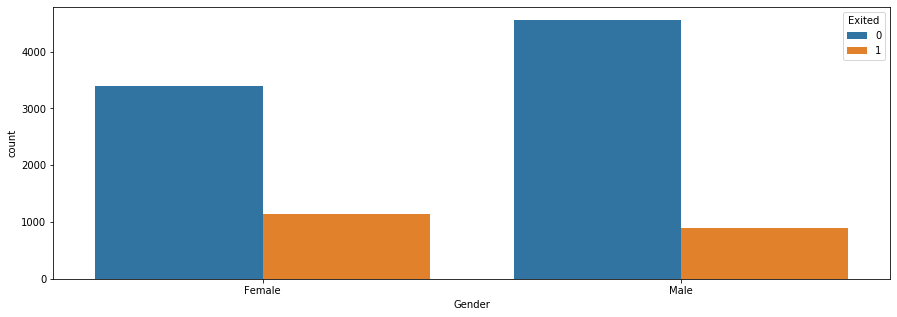

In [784]:
plt.figure(figsize=(15,5))
sns.countplot(bank_df['Gender'],hue=bank_df['Exited'])

#### By proportion, the customer churn is highest among females when compared to males.

### Tenure Attribute Analysis

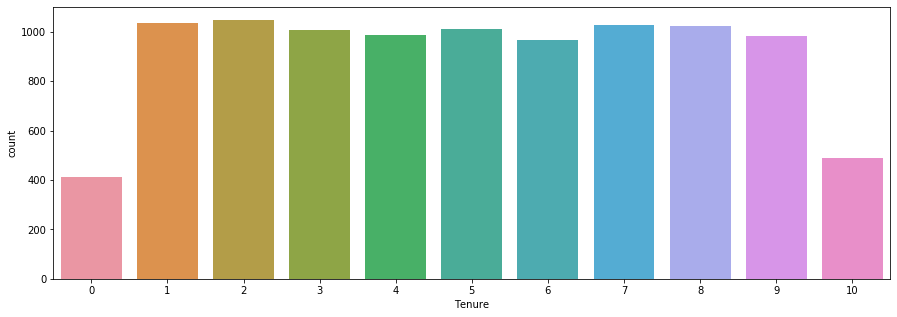

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(bank_df['Tenure'])

#### Its a uniform distribution with most of the people lying the range of 1 year to 9 years. There are very few new customers and very few old customers with more than 10 years of tenure.

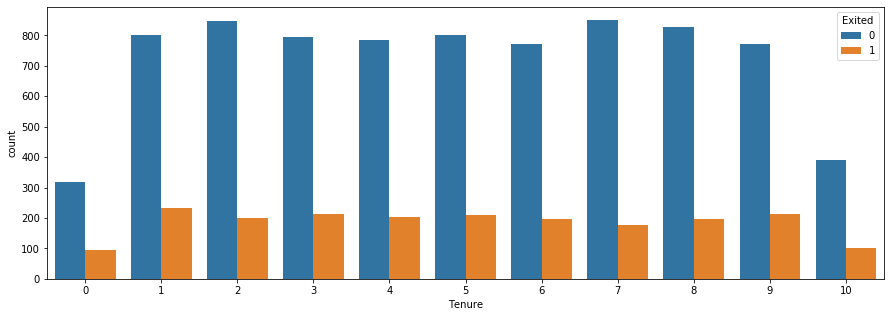

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(bank_df['Tenure'],hue=bank_df['Exited'])

#### The number of customers existed are almost equally distributed accross the # of years in a tenure.

#### Balance Attribute Analysis

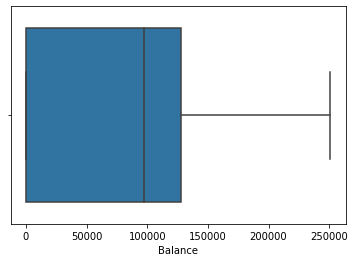

In [36]:
sns.boxplot(bank_df['Balance'])

#### Most of the customers are having either 0 or 1200000 dollars bank balance. There are very few above 1200000 dollars balance.

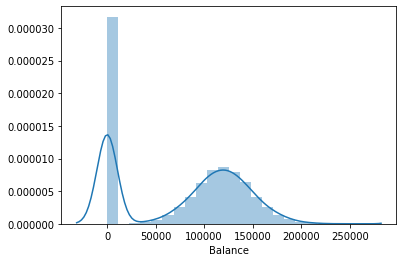

In [37]:
sns.distplot(bank_df['Balance'])

#### There are 2 peaks in this distribution with one peak of customers with 0 dollars balance and others follow a normal distribution with a long tail ending at 2500000 dollars

### EstimatedSalary Attribute Analysis

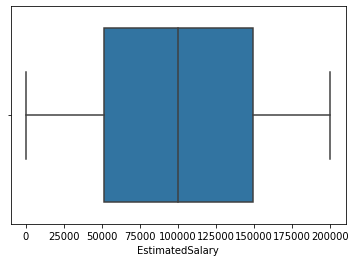

In [785]:
sns.boxplot(bank_df['EstimatedSalary'])

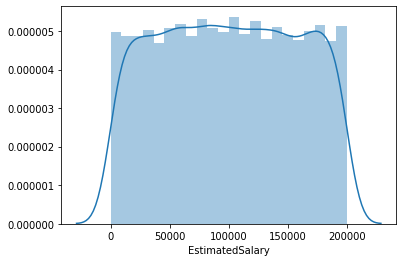

In [38]:
sns.distplot(bank_df['EstimatedSalary'])

#### This is a uniform distribution with values startimg from as low as 1100 dollars to a maximum of 200000 dollars. The standard deviation is quite high.The median of pouplation is at salary of 100000 dollars. Majority of the population is in salary range of 50000 dollars to 150000 dollars.

### NumOfProducts Attribute Analysis

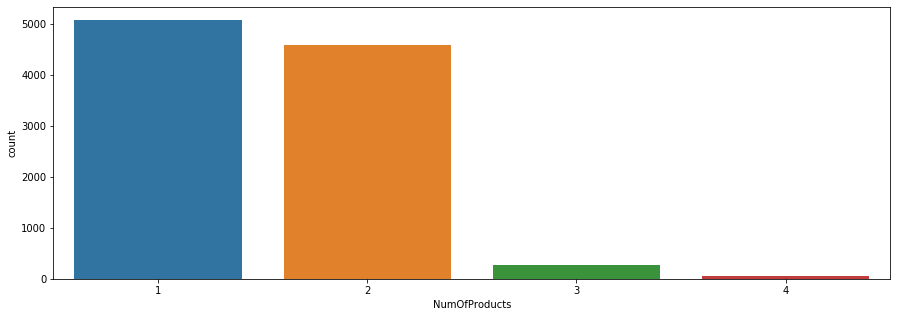

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(bank_df['NumOfProducts'])

#### Most the customers with bank have either 1 or 2 products. There are few customers with 3 or more products.

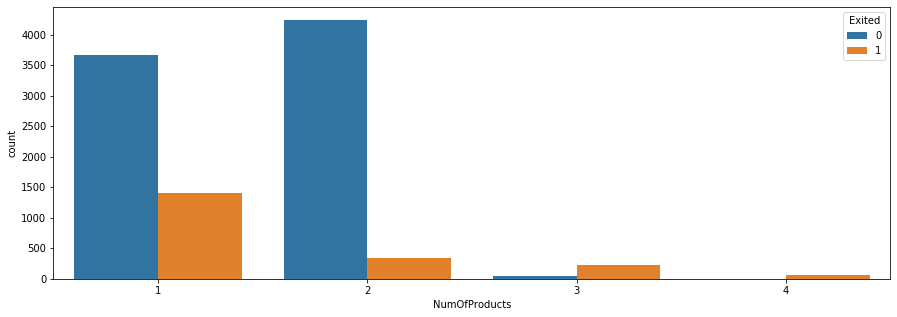

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(bank_df['NumOfProducts'],hue=bank_df['Exited'])

#### The exited customers are mostly those who have 1 product with the bank. By propotion, customers with 3 or 4 products are more likely to exit than those with 1 or 2 products

### HasCrCard Attribute Analysis

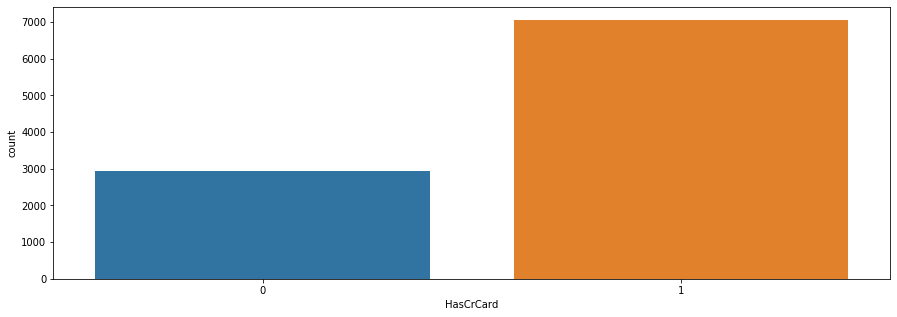

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(bank_df['HasCrCard'])

#### Majority of the customers have credit card with the bank.Almost 40% have credit cards.

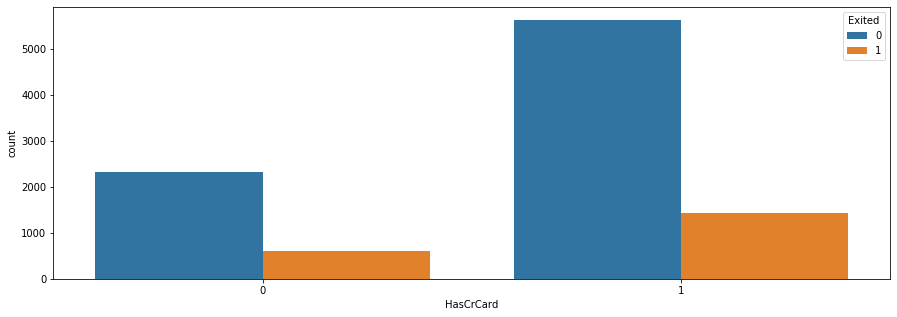

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(bank_df['HasCrCard'],hue=bank_df['Exited'])

#### Although, the customers with credit card has exited, there are equally good number of customers without credit card who exited.

### IsActiveMember Attribute Analysis

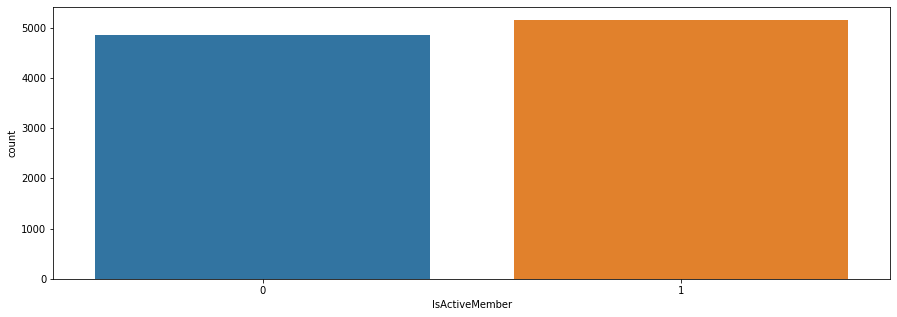

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(bank_df['IsActiveMember'])

#### There are almost equal numer of active and non-active customers with the bank

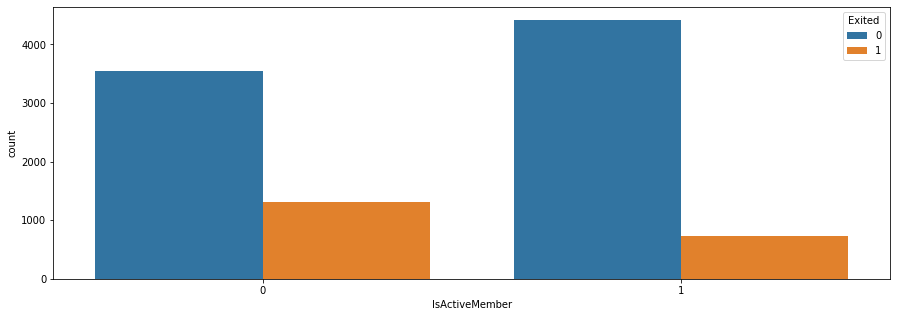

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(bank_df['IsActiveMember'],hue=bank_df['Exited'])

#### By proportion, the majority of the exited members are mostly the non-active members than the active members.

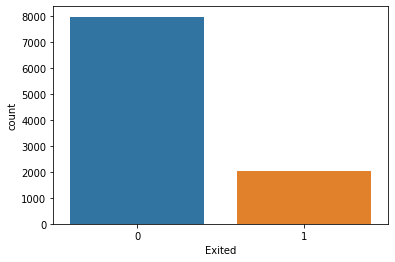

In [786]:
sns.countplot(bank_df['Exited'])

#### The number of exited customers are 20% of the total population and the proportion of exited to non-exited is 1:4. That is for every customer who left there are four who stayed.

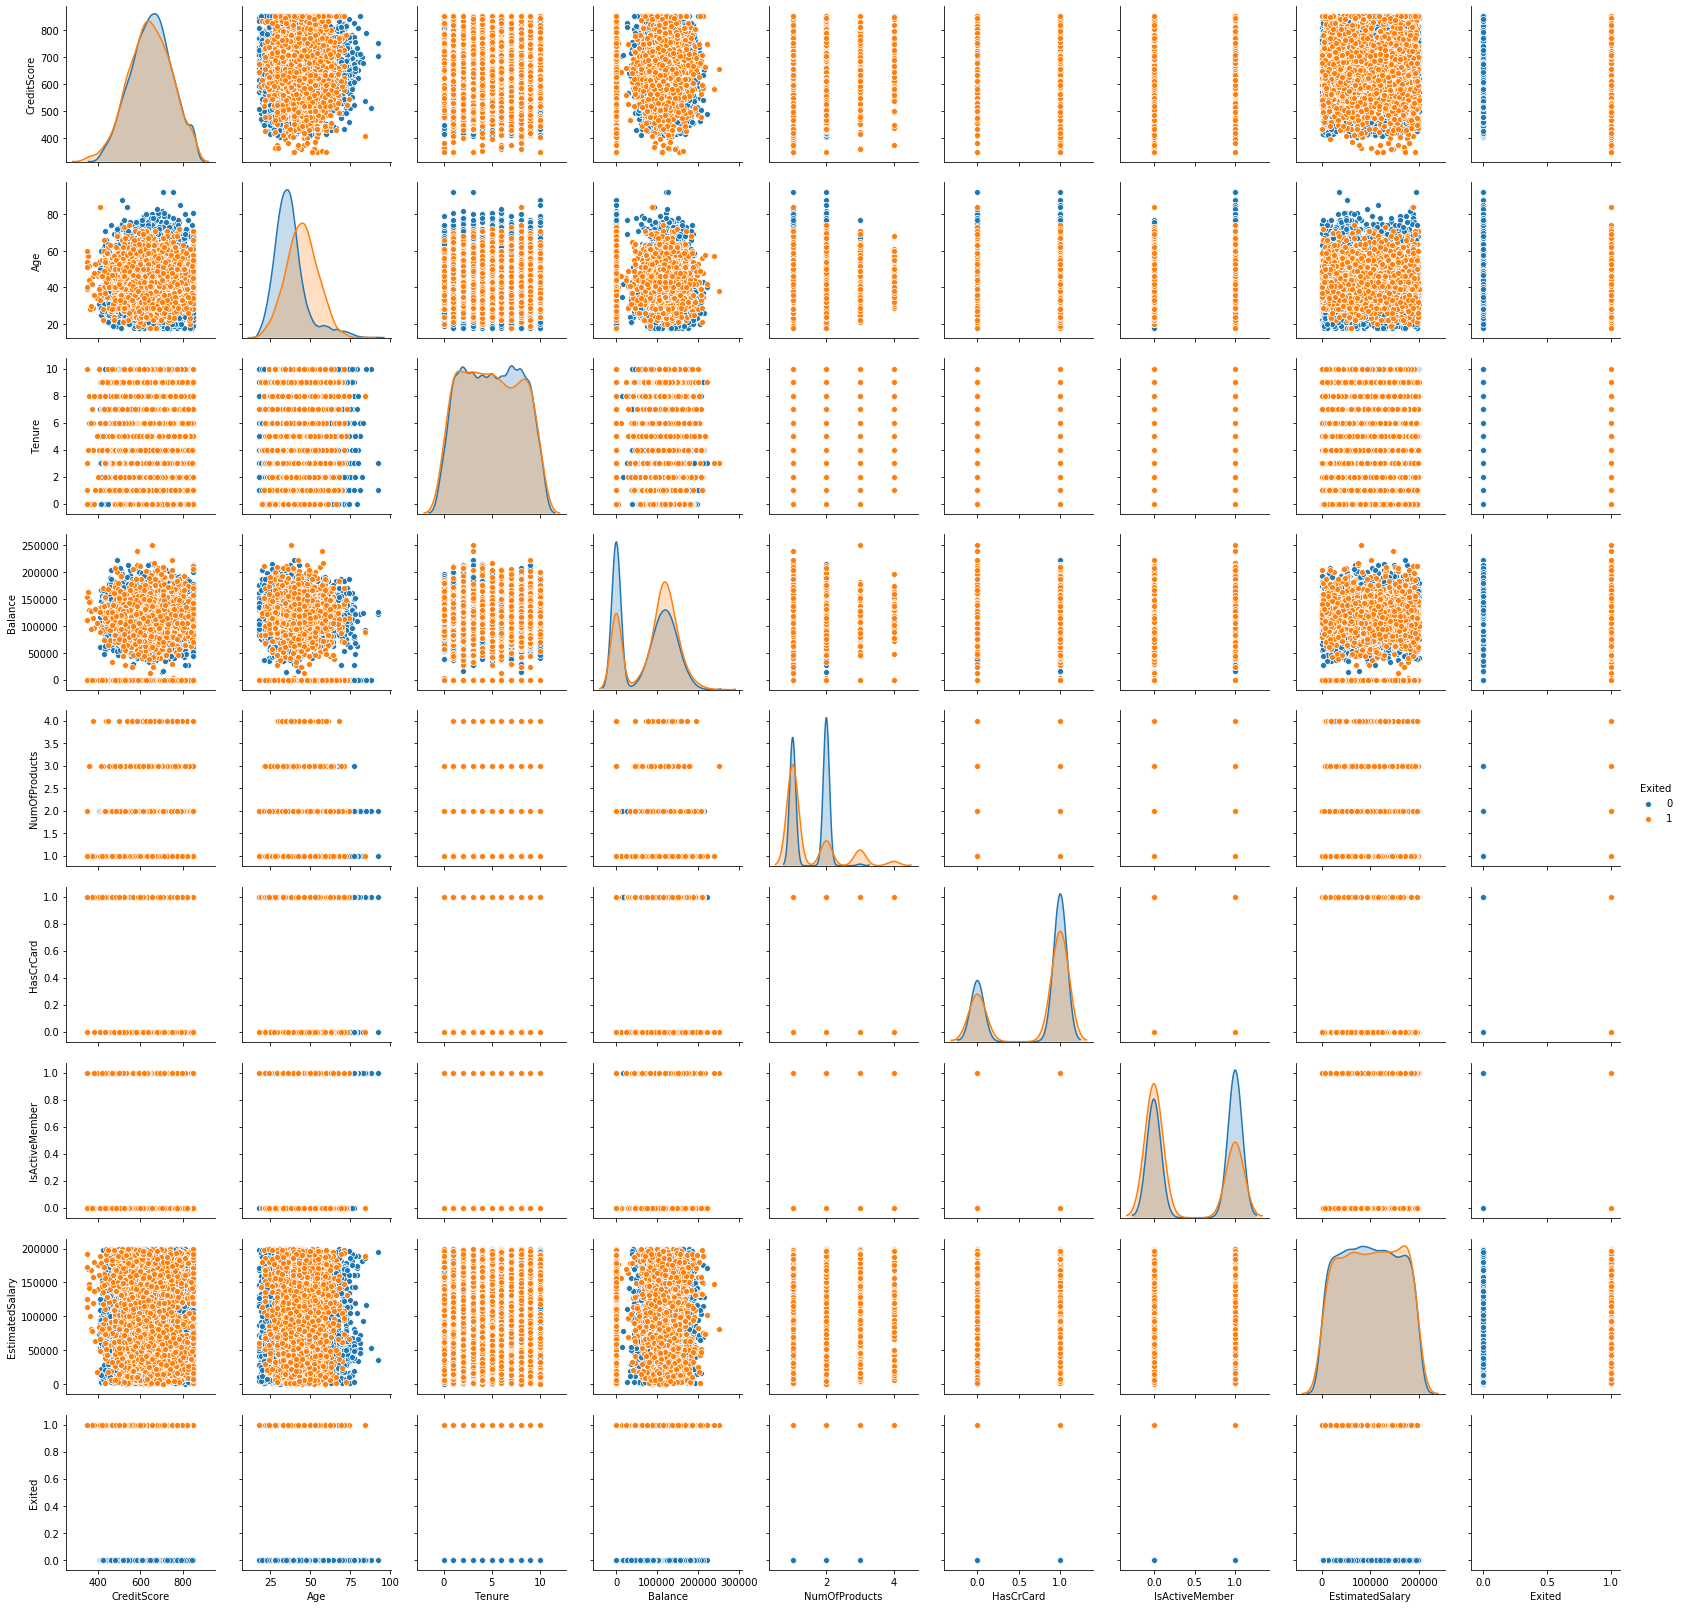

In [793]:
sns.pairplot(bank_df,diag_kind='kde',hue='Exited')

#### It is clearly shown in the pairplot that there is no or very little collinearity between the attributes.

## 3.Distinguish the feature and target set 

In [1112]:
y= bank_df.iloc[:,-1]
X = bank_df.iloc[:,:-1]

In [1113]:
#feature list
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [1114]:
#Target
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## 4.Divide the data set into training and test sets 

In [1115]:
from sklearn.model_selection import train_test_split

In [1116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [1117]:
X_train


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4901,673,France,Male,59,0,178058.06,2,0,1,21063.71
4375,850,Germany,Male,41,8,60880.68,1,1,0,31825.84
6698,725,France,Female,31,6,0.00,1,0,0,61326.43
9805,644,France,Male,33,7,174571.36,1,0,1,43943.09
1101,703,Spain,Male,29,9,0.00,2,1,0,50679.48
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05
5191,682,France,Female,58,1,0.00,1,1,1,706.50
5390,735,France,Female,38,1,0.00,3,0,0,92220.12
860,667,France,Male,43,8,190227.46,1,1,0,97508.04


In [1118]:
y_train

4901    1
4375    0
6698    0
9805    0
1101    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 7500, dtype: int64

#### Encoding Categorical variables 

In [1119]:
X_train_encoded=pd.get_dummies(X_train)

In [1120]:
X_train_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4901,673,59,0,178058.06,2,0,1,21063.71,1,0,0,0,1
4375,850,41,8,60880.68,1,1,0,31825.84,0,1,0,0,1
6698,725,31,6,0.00,1,0,0,61326.43,1,0,0,1,0
9805,644,33,7,174571.36,1,0,1,43943.09,1,0,0,0,1
1101,703,29,9,0.00,2,1,0,50679.48,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,1,0,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,1,0,0,1,0
5390,735,38,1,0.00,3,0,0,92220.12,1,0,0,1,0
860,667,43,8,190227.46,1,1,0,97508.04,1,0,0,0,1


In [1121]:
X_test_encoded=pd.get_dummies(X_test)

In [1122]:
X_train_encoded.shape

(7500, 13)

In [1123]:
X_test_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6252,596,32,3,96709.07,2,0,0,41788.37,0,1,0,0,1
4684,623,43,1,0.00,2,1,1,146379.30,1,0,0,0,1
1731,601,44,4,0.00,2,1,0,58561.31,0,0,1,1,0
4742,506,59,8,119152.10,2,1,1,170679.74,0,1,0,0,1
4521,560,27,7,124995.98,1,1,1,114669.79,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,645,55,1,133676.65,1,0,1,17095.49,0,0,1,1,0
7025,569,51,3,0.00,3,1,0,75084.96,0,0,1,1,0
7647,768,25,0,78396.08,1,1,1,8316.19,1,0,0,0,1
7161,690,36,6,110480.48,1,0,0,81292.33,1,0,0,1,0


## 5.Normalize the train and test data 

#### Normalize and scale features and target and convert them into numpy array of data type float 32.

In [1124]:
from sklearn.preprocessing import StandardScaler

# Define the standard scalar
scaler=StandardScaler().fit(X_train_encoded)

# Scale the train set
X_train_norm = scaler.transform(X_train_encoded)
# Scale the test set
X_test_norm = scaler.transform(X_test_encoded)

In [1127]:
X_train_norm=X_train_norm.astype('Float64')
X_test_norm=X_test_norm.astype('Float64')

In [1128]:
y_train=y_train.astype('float64')
y_test=y_test.astype('float64')

In [1150]:
y_train_encoded=pd.get_dummies(y_train)

In [1183]:
y_test_encoded=pd.get_dummies(y_test)

In [1129]:
y_train=numpy.asarray(y_train)

In [1157]:
y_train_encoded=numpy.asarray(y_train_encoded)

In [1184]:
y_test_encoded=numpy.asarray(y_test_encoded)

In [1130]:
y_test=numpy.asarray(y_test)

In [1131]:
y_train.shape

(7500,)

In [1132]:
X_train_norm.shape

(7500, 13)

In [1152]:
y_train_encoded.shape

(7500, 2)

## 6.Initialize & build the model 

In [1133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Creating Baseline Model

#### Create a sequential model with 2 hidden layers and one input and output layer.

In [1524]:
model = Sequential()

# Add an input layer 
#model.add(Dense(6, activation='tanh', input_shape=(13,)))
model.add(Dense(80, activation='sigmoid', input_shape=(13,)))
# Add one hidden layer 
model.add(Dense(40, activation='relu'))
model.add(Dense(8, activation='relu'))
# Add an output layer 
model.add(Dense(1, activation='sigmoid'))


#### Compile the model with loss function of Binary Crossentropy and optimizer =ADAM

In [1525]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [1526]:
model.summary()

Model: "sequential_215"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1048 (Dense)           (None, 80)                1120      
_________________________________________________________________
dense_1049 (Dense)           (None, 40)                3240      
_________________________________________________________________
dense_1050 (Dense)           (None, 8)                 328       
_________________________________________________________________
dense_1051 (Dense)           (None, 1)                 9         
Total params: 4,697
Trainable params: 4,697
Non-trainable params: 0
_________________________________________________________________


In [1527]:
import numpy
history = model.fit(X_train_norm, y_train,epochs=100, batch_size=512)

Epoch 1/100
7500/7500 [==============================] - 1s 133us/step - loss: 0.6012 - accuracy: 0.6763
Epoch 2/100
7500/7500 [==============================] - 0s 8us/step - loss: 0.5033 - accuracy: 0.7947
Epoch 3/100
7500/7500 [==============================] - 0s 8us/step - loss: 0.4917 - accuracy: 0.7947
Epoch 4/100
7500/7500 [==============================] - 0s 8us/step - loss: 0.4832 - accuracy: 0.7947
Epoch 5/100
7500/7500 [==============================] - 0s 8us/step - loss: 0.4739 - accuracy: 0.7947
Epoch 6/100
7500/7500 [==============================] - 0s 8us/step - loss: 0.4648 - accuracy: 0.7947
Epoch 7/100
7500/7500 [==============================] - 0s 8us/step - loss: 0.4565 - accuracy: 0.7955
Epoch 8/100
7500/7500 [==============================] - 0s 9us/step - loss: 0.4485 - accuracy: 0.8011
Epoch 9/100
7500/7500 [==============================] - 0s 8us/step - loss: 0.4424 - accuracy: 0.8052
Epoch 10/100
7500/7500 [==============================] - 0s 8us/step -

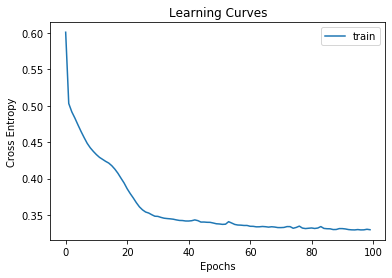

In [1528]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(history.history['loss'],label='train')
plt.legend()
plt.show()

#### The loss is very high between 20 to 30 epochs and then it gradullay decreases.

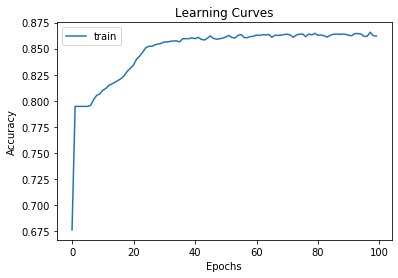

In [1529]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'],label='train')
plt.legend()
plt.show()

#### Accuracy is very low between 20 to 30 epochs as loss was highest at this point.

## 7.Predict the results using 0.5 as a threshold 

## 8.Print the accuracy score and confusion matrix.

In [1586]:
score = model.evaluate(X_test_norm, y_test,verbose=0)
print(score)

[0.3327357473134995, 0.8668000102043152]


In [1589]:
y_pred_base = (model.predict(X_test_norm))

In [1590]:
y_train_pred_base=(model.predict(X_train_norm))

In [1591]:
from sklearn.metrics import classification_report, confusion_matrix

In [1592]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  print(classification_report(labels, predictions > p))
  print(cm)

In [1593]:
plot_cm(y_test,y_pred_base)

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      2003
         1.0       0.78      0.45      0.58       497

    accuracy                           0.87      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500

[[1941   62]
 [ 271  226]]


### From the classification matrix it can be seen that although the accuracy is 86.6%, the minority classs i.e. of "Exited" customers is very bad and only 45%.So this model needs some tuning

### Hyperparamer tunning using GridSearchCV

In [382]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(80, activation='sigmoid', input_shape=(13,)))
    # Add one hidden layer 
    model.add(Dense(40, activation='relu'))
    model.add(Dense(8, activation='relu'))
    # Add an output layer 
    model.add(Dense(1, activation='relu'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model


In [383]:
# fix random seed for reproducibility
seed = 42
numpy.random.seed(seed)
# create model
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
model = KerasClassifier(build_fn=create_model)
# define the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_norm, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/50
7500/7500 [==============================] - 2s 296us/step - loss: 3.1673 - accuracy: 0.7947
Epoch 2/50
7500/7500 [==============================] - 2s 206us/step - loss: 3.1673 - accuracy: 0.7947
Epoch 3/50
7500/7500 [==============================] - 2s 214us/step - loss: 3.1673 - accuracy: 0.7947
Epoch 4/50
7500/7500 [==============================] - 2s 205us/step - loss: 3.1673 - accuracy: 0.7947
Epoch 5/50
7500/7500 [==============================] - 2s 203us/step - loss: 3.1673 - accuracy: 0.7947
Epoch 6/50
7500/7500 [==============================] - 1s 194us/step - loss: 3.1673 - accuracy: 0.7947
Epoch 7/50
7500/7500 [==============================] - 2s 206us/step - loss: 3.1673 - accuracy: 0.7947
Epoch 8/50
7500/7500 [==============================] - 2s 219us/step - loss: 3.1673 - accuracy: 0.7947
Epoch 9/50
7500/7500 [==============================] - 1s 189us/step - loss: 3.1673 - accuracy: 0.7947
Epoch 10/50
7500/7500 [==============================] - 1s 193u

### Hyperparamer tunning using RandomSearchCV

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from time import time
start= time()
model = KerasClassifier(build_fn=create_model,verbose=1)
n_iter_search = 16 # Number of parameter settings that are sampled.
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([50, 100, 150])
batches = np.array([5, 10, 20])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches)

random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_grid,
                                   n_iter=n_iter_search)
random_search.fit(X_train_norm, y_train)
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
print("total time:",time()-start)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/1
2500/2500 [==============================] - 0s 66us/step
Epoch 1/1
2500/2500 [==============================] - 0s 62us/step
Epoch 1/1
2500/2500 [==============================] - 0s 74us/step
Epoch 1/1
2500/2500 [==============================] - 0s 104us/step
Epoch 1/1
2500/2500 [==============================] - 0s 101us/step
Epoch 1/1
2500/2500 [==============================] - 0s 107us/step
Epoch 1/1
2500/2500 [==============================] - 0s 114us/step
Epoch 1/1
2500/2500 [==============================] - 0s 96us/step
Epoch 1/1
2500/2500 [==============================] - 0s 101us/step
Epoch 1/1
2500/2500 [==============================] - 0s 103us/step
Epoch 1/1
2500/2500 [==============================] - 0s 98us/step
Epoch 1/1
2500/2500 [==============================] - 0s 99us/step
Epoch 1/1
2500/2500 [==============================] - 0s 158us/step
Epoch 1/1
2500/2500 [==============================] - 0s 161us/step
Epoch 1/1
2500/2500 [===================

### Both the Random and Grid searches return a model with lesser accuracy than the original one.So lets manually tune the hyper parameters as shown in the model below.

### Creating Tuned Model by increasing the epochs to 150, adding dropouts to generalize the model,adding weight initialization and adding more hidden layers.

In [1534]:
from keras.layers import *
from keras.models import *

In [1569]:
model1 = Sequential()
# Add an input layer 
model1.add(Dense(80, activation='sigmoid', input_shape=(13,)))
model1.add(Dropout(0.5))
# Add one hidden layer 
model1.add(Dense(40,init='he_normal', bias=True, activation='relu'))
model1.add(Dense(20,init='he_normal', bias=True, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(8, init='he_normal', bias=True, activation='relu'))
model1.add(Dense(6, init='he_normal', bias=True, activation='relu'))
# Add an output layer 
model1.add(Dense(1, activation='sigmoid'))

In [1570]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [1571]:
model1.summary()

Model: "sequential_222"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1082 (Dense)           (None, 80)                1120      
_________________________________________________________________
dropout_76 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_1083 (Dense)           (None, 40)                3240      
_________________________________________________________________
dense_1084 (Dense)           (None, 20)                820       
_________________________________________________________________
dropout_77 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_1085 (Dense)           (None, 8)                 168       
_________________________________________________________________
dense_1086 (Dense)           (None, 6)              

In [1572]:
history1 = model1.fit(X_train_norm, y_train,epochs=150, batch_size=512)

Epoch 1/150
7500/7500 [==============================] - 1s 200us/step - loss: 0.6840 - accuracy: 0.6000
Epoch 2/150
7500/7500 [==============================] - 0s 11us/step - loss: 0.5650 - accuracy: 0.7879
Epoch 3/150
7500/7500 [==============================] - 0s 11us/step - loss: 0.5237 - accuracy: 0.7940
Epoch 4/150
7500/7500 [==============================] - 0s 12us/step - loss: 0.5182 - accuracy: 0.7945
Epoch 5/150
7500/7500 [==============================] - 0s 12us/step - loss: 0.5100 - accuracy: 0.7941
Epoch 6/150
7500/7500 [==============================] - 0s 11us/step - loss: 0.5025 - accuracy: 0.7947
Epoch 7/150
7500/7500 [==============================] - 0s 11us/step - loss: 0.4973 - accuracy: 0.7947
Epoch 8/150
7500/7500 [==============================] - 0s 12us/step - loss: 0.4875 - accuracy: 0.7948
Epoch 9/150
7500/7500 [==============================] - 0s 12us/step - loss: 0.4866 - accuracy: 0.7947
Epoch 10/150
7500/7500 [==============================] - 0s 12

7500/7500 [==============================] - 0s 12us/step - loss: 0.3944 - accuracy: 0.8269
Epoch 80/150
7500/7500 [==============================] - 0s 12us/step - loss: 0.3979 - accuracy: 0.8287
Epoch 81/150
7500/7500 [==============================] - 0s 12us/step - loss: 0.3895 - accuracy: 0.8309
Epoch 82/150
7500/7500 [==============================] - 0s 12us/step - loss: 0.3862 - accuracy: 0.8309
Epoch 83/150
7500/7500 [==============================] - 0s 12us/step - loss: 0.3867 - accuracy: 0.8345
Epoch 84/150
7500/7500 [==============================] - 0s 12us/step - loss: 0.3876 - accuracy: 0.8335
Epoch 85/150
7500/7500 [==============================] - 0s 12us/step - loss: 0.3875 - accuracy: 0.8329
Epoch 86/150
7500/7500 [==============================] - 0s 12us/step - loss: 0.3828 - accuracy: 0.8383
Epoch 87/150
7500/7500 [==============================] - 0s 12us/step - loss: 0.3844 - accuracy: 0.8388
Epoch 88/150
7500/7500 [==============================] - 0s 12us/st

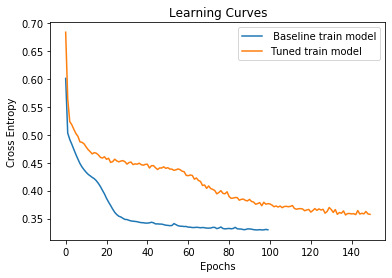

In [1573]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(history.history['loss'],label=' Baseline train model')
plt.plot(history1.history['loss'],label='Tuned train model')
plt.legend()
plt.show()

In [ ]:
The learning curve shows the tuned model is not better than the base model

#### The loss is lesser in this case when compared to baseline model.

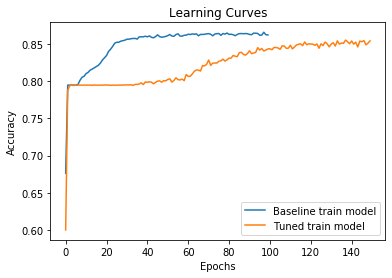

In [1574]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'],label='Baseline train model')
plt.plot(history1.history['accuracy'],label='Tuned train model')
plt.legend()
plt.show()

In [1575]:
score = model1.evaluate(X_test_norm, y_test,verbose=0)
print(score)

[0.34462171676158904, 0.864799976348877]


#### The accuracy of tuned model is almost equal to the baseline model.

#### The model performs consistently on test data as well with 86% of accuracy.

## 7.Predict the results using 0.5 as a threshold 

In [1576]:
y_pred = (model1.predict(X_test_norm))

In [1577]:
y_train_pred=(model1.predict(X_train_norm))

## 8.Print the Accuracy score and confusion matrix 

In [1578]:
from sklearn.metrics import classification_report, confusion_matrix

In [1579]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  print(classification_report(labels, predictions > p))
  print(cm)  

In [1580]:
plot_cm(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      2003
         1.0       0.81      0.41      0.55       497

    accuracy                           0.86      2500
   macro avg       0.84      0.70      0.73      2500
weighted avg       0.86      0.86      0.85      2500

[[1956   47]
 [ 291  206]]


#### The recall of the tuned model is 41 % for class -1, whereas for the baseline its 45%. So model needs to be tuned based on the class proportions.

### ROC curve for the tuned model

In [1581]:
from sklearn.metrics import roc_curve
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

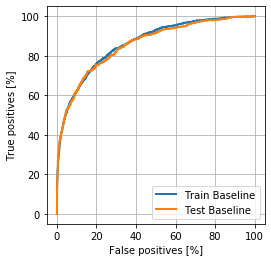

In [1582]:
plot_roc("Train Baseline", y_train, y_train_pred)
plot_roc("Test Baseline", y_test, y_pred)
plt.legend(loc='lower right')

### The ROC curve shows that the model has generalized well and the train and test accuracy are very close.But, since its recall for class -1 is very bad, this model cannot be vry useful in predicting customer churn.

## Weighted Class Model for the imbalance dataset

### Since the bank data is imbalanced and the proportion of churn vs non-churn is 20:80, we will create a model that will use weights for each of the classes while fitting and predicting.

### Assigning class weights

In [1222]:
neg, pos = np.bincount(bank_df['Exited'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 10000
    Positive: 2037 (20.37% of total)



In [1365]:
from keras.layers import *
from keras.models import *

In [1431]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.45


### Creating sequential weighted model

In [1503]:
model2 = Sequential()
# Add an input layer 
model2.add(Dense(80, activation='sigmoid', input_shape=(13,)))
model2.add(Dropout(0.5))
# Add one hidden layer
model2.add(Dense(40, init='he_normal', bias=True,activation='relu'))
#model2.add(Dropout(0.3))
model2.add(Dense(20,init='he_normal', bias=True, activation='relu'))
model2.add(Dense(10,init='he_normal', bias=True, activation='relu'))
model2.add(Dense(8,init='he_normal', bias=True, activation='relu'))
model2.add(Dense(6,init='he_normal', bias=True, activation='relu'))
model2.add(Dense(4, init='he_normal', bias=True,activation='relu'))
# Add an output layer 
model2.add(Dense(1, activation='sigmoid'))

In [1504]:
from keras.optimizers import adam

In [1505]:
adam= adam(lr=0.0001)
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [1506]:
model2.summary()

Model: "sequential_212"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1032 (Dense)           (None, 80)                1120      
_________________________________________________________________
dropout_66 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_1033 (Dense)           (None, 40)                3240      
_________________________________________________________________
dense_1034 (Dense)           (None, 20)                820       
_________________________________________________________________
dense_1035 (Dense)           (None, 10)                210       
_________________________________________________________________
dense_1036 (Dense)           (None, 8)                 88        
_________________________________________________________________
dense_1037 (Dense)           (None, 6)              

In [1507]:
history2 = model2.fit(X_train_norm, y_train,epochs=200, batch_size=512,class_weight=class_weight)

Epoch 1/200
7500/7500 [==============================] - 2s 238us/step - loss: 0.6958 - accuracy: 0.4901
Epoch 2/200
7500/7500 [==============================] - 0s 11us/step - loss: 0.6949 - accuracy: 0.6215
Epoch 3/200
7500/7500 [==============================] - 0s 11us/step - loss: 0.6953 - accuracy: 0.6471
Epoch 4/200
7500/7500 [==============================] - 0s 11us/step - loss: 0.6931 - accuracy: 0.6384
Epoch 5/200
7500/7500 [==============================] - 0s 17us/step - loss: 0.6900 - accuracy: 0.4025
Epoch 6/200
7500/7500 [==============================] - 0s 11us/step - loss: 0.6845 - accuracy: 0.5676
Epoch 7/200
7500/7500 [==============================] - 0s 11us/step - loss: 0.6769 - accuracy: 0.4901
Epoch 8/200
7500/7500 [==============================] - 0s 11us/step - loss: 0.6704 - accuracy: 0.5865
Epoch 9/200
7500/7500 [==============================] - 0s 11us/step - loss: 0.6609 - accuracy: 0.6339
Epoch 10/200
7500/7500 [==============================] - 0s 12

7500/7500 [==============================] - 0s 11us/step - loss: 0.5198 - accuracy: 0.7623
Epoch 80/200
7500/7500 [==============================] - 0s 11us/step - loss: 0.5176 - accuracy: 0.7684
Epoch 81/200
7500/7500 [==============================] - 0s 11us/step - loss: 0.5220 - accuracy: 0.7561
Epoch 82/200
7500/7500 [==============================] - 0s 12us/step - loss: 0.5151 - accuracy: 0.7585
Epoch 83/200
7500/7500 [==============================] - 0s 12us/step - loss: 0.5137 - accuracy: 0.7599
Epoch 84/200
7500/7500 [==============================] - 0s 11us/step - loss: 0.5138 - accuracy: 0.7583
Epoch 85/200
7500/7500 [==============================] - 0s 12us/step - loss: 0.5111 - accuracy: 0.7704
Epoch 86/200
7500/7500 [==============================] - 0s 11us/step - loss: 0.5071 - accuracy: 0.7700
Epoch 87/200
7500/7500 [==============================] - 0s 12us/step - loss: 0.5157 - accuracy: 0.7568
Epoch 88/200
7500/7500 [==============================] - 0s 11us/st

### The weighted model performed poorly than the tuned and the baseline model in terms of accuracy and loss

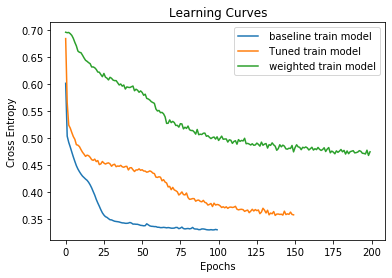

In [1583]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.plot(history.history['loss'],label=' baseline train model')
plt.plot(history1.history['loss'],label=' Tuned train model')
plt.plot(history2.history['loss'],label=' weighted train model')
plt.legend()
plt.show()

#### It performed badly with respoect to Loss as well.

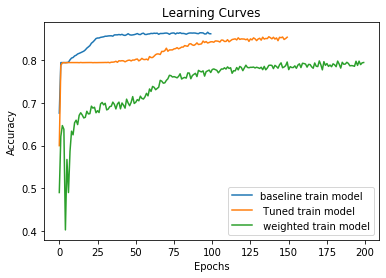

In [1584]:
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'],label='baseline train model')
plt.plot(history1.history['accuracy'],label=' Tuned train model')
plt.plot(history2.history['accuracy'],label=' weighted train model')
plt.legend()
plt.show()


#### It performs poorly in terms of accuracy as well.

## 7.Predict the results using 0.5 as a threshold 

## 8.Print the Accuracy score and confusion matrix 

In [1508]:
score = model2.evaluate(X_test_norm, y_test,verbose=0)
print(score)

[0.416776505279541, 0.8324000239372253]


### The model perform better on testset than on train data

In [1511]:
y_pred_w = (model2.predict(X_test_norm))
y_train_pred_w=(model2.predict(X_train_norm))

In [1512]:
plot_cm(y_test,y_pred_w)

              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89      2003
         1.0       0.56      0.71      0.63       497

    accuracy                           0.83      2500
   macro avg       0.74      0.78      0.76      2500
weighted avg       0.85      0.83      0.84      2500

[[1730  273]
 [ 146  351]]


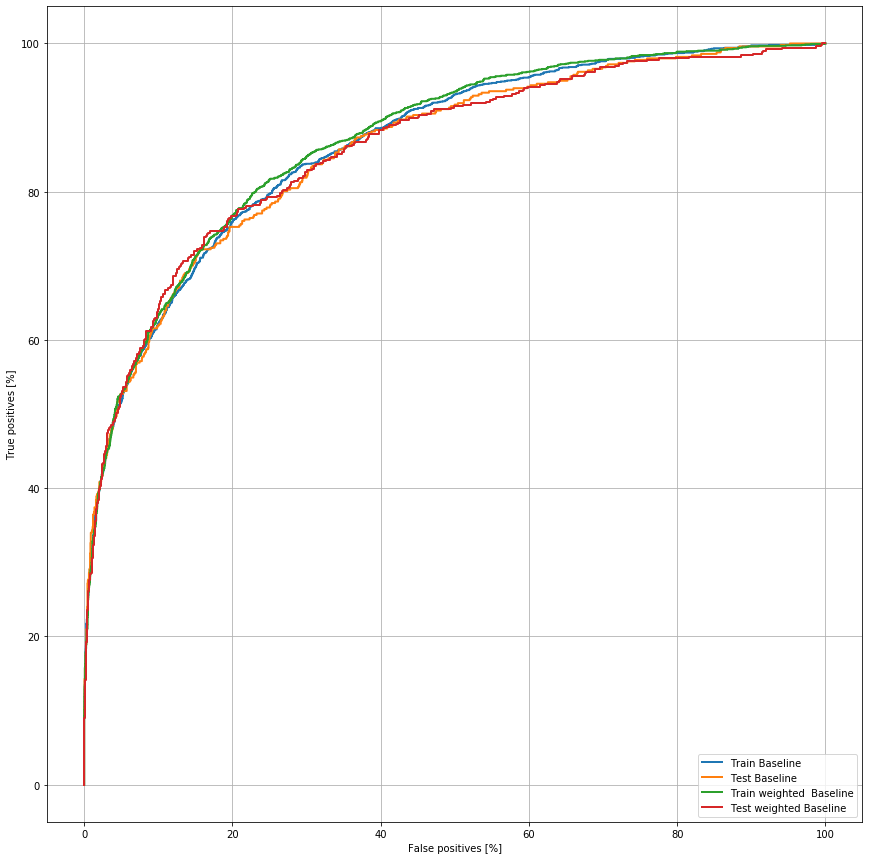

In [1585]:
plt.figure(figsize=(20,15))
plot_roc("Train Baseline", y_train, y_train_pred)
plot_roc("Test Baseline", y_test, y_pred)
plot_roc("Train weighted  Baseline", y_train, y_train_pred_w)
plot_roc("Test weighted Baseline", y_test, y_pred_w)
plt.legend(loc='lower right')


### By looking at the ROC curve, it can be said that the Weighted Class model has generalized well and performed almost equally to the tuned model's perfomance.

### Conclusion:

### This model has been the best one so far in terms of recall for class '1' . It has improved recall by almost 25 percentage points. The accuracy is 3 percentage points lower than the baseline and tuned model but to solve this particular business problem where business want to focus on those customers who are leaving and joining another provider that is class "1". When there is a miscalssification of class "0" customer the bank will only end up offering more services to already happy customer which can increase their loyalty. But if a class "1" customer is missclassified as "0", the bank might end up losing that customer. So, in this particular case, recall of calss "1" is more important than recall of class "0" or the reduction in accuracy by few percentage points.Therefore, the class weighted model is the best one in this case as recall of "1" is better than all the models created so far.

### Although Weighted model performs poorly when compared to Baseline and tuned model in terms of accuracy, the classification of "Exited" customers was better. Since, the dataset is imbalanced, the weighted model is more useful in prediction of Exited customers of a bank.